![image](../imgs/databites_header.png)

# 10 Python One-Liners for Statistical Plotting

Statistical plotting is one of the most important tools in exploratory data analysis.
Whether you’re trying to understand distributions, relationships, or anomalies, quick and effective visualizations can help you uncover insights faster.
That’s why today I’ll walk you through 10 Python one-liners for statistical plotting using the Arabica coffee quality dataset, which contains over 1,300 rows of sensory and chemical measurements from global coffee samples.

# Preparing the Environment and Loading the Data
- Make sure you have Python 3.13+ and basic SQL/Python skills.
- Create a project directory, set up a virtual environment, and install both numpy and pandas. 


## Installing and importing the required libraries

In [1]:
!pip install pandas seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Getting the dummy data
We’ll be using pandas, matplotlib, and seaborn, which together offer a rich and intuitive plotting interface. To follow along, first load the dataset into your environment:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'
df = pd.read_csv(url)

## 1. Histogram of Total Cup Points

<Axes: >

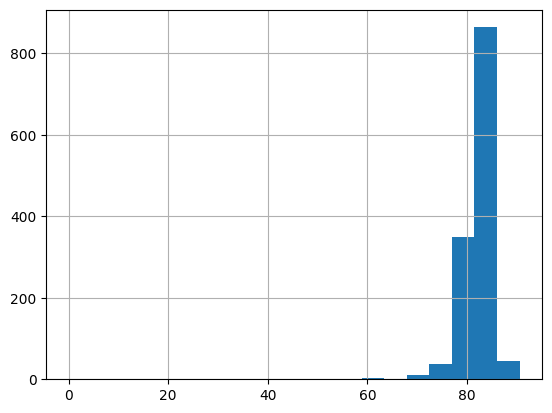

In [3]:
df['Total.Cup.Points'].hist(bins=20)

## 2. Boxplot by Country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Ethiopia'),
  Text(1, 0, 'Guatemala'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Peru'),
  Text(4, 0, 'United States'),
  Text(5, 0, 'United States (Hawaii)'),
  Text(6, 0, 'Indonesia'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Costa Rica'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Uganda'),
  Text(11, 0, 'Honduras'),
  Text(12, 0, 'Taiwan'),
  Text(13, 0, 'Nicaragua'),
  Text(14, 0, 'Tanzania, United Republic Of'),
  Text(15, 0, 'Kenya'),
  Text(16, 0, 'Thailand'),
  Text(17, 0, 'Colombia'),
  Text(18, 0, 'Panama'),
  Text(19, 0, 'Papua New Guinea'),
  Text(20, 0, 'El Salvador'),
  Text(21, 0, 'Japan'),
  Text(22, 0, 'Ecuador'),
  Text(23, 0, 'United States (Puerto Rico)'),
  Text(24, 0, 'Haiti'),
  Text(25, 0, 'Burundi'),
  Text(26, 0, 'Vietnam'),
  Text(27, 0, 'Philippines'),

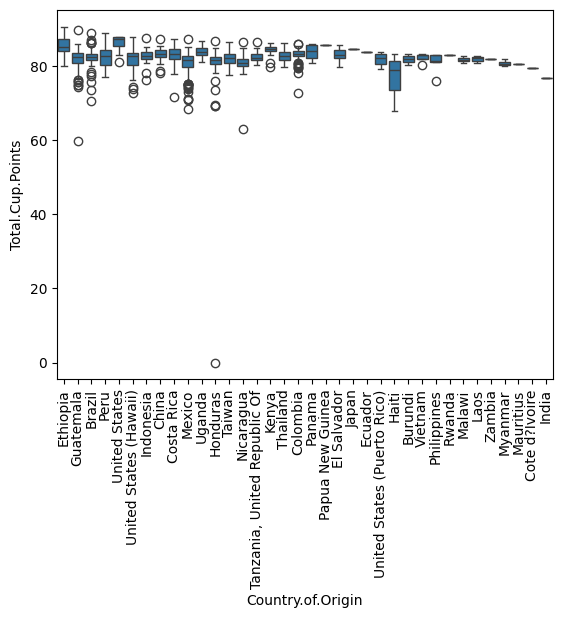

In [4]:
sns.boxplot(data=df, x='Country.of.Origin', y='Total.Cup.Points')
plt.xticks(rotation=90)

## 3. KDE Plot of Acidity

<Axes: xlabel='Acidity', ylabel='Density'>

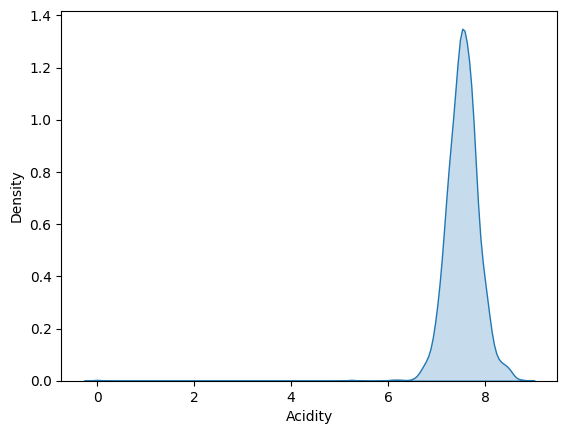

In [5]:
sns.kdeplot(df['Acidity'], fill=True)

## 4. Violin Plot by Processing Method

<Axes: xlabel='Processing.Method', ylabel='Body'>

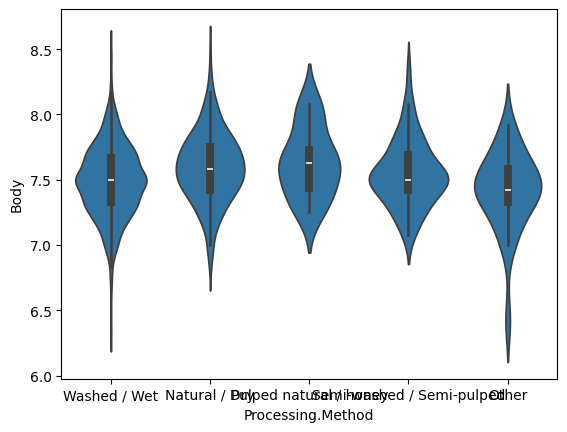

In [6]:
sns.violinplot(data=df, x='Processing.Method', y='Body')

## 5. Correlation Heatmap

<Axes: >

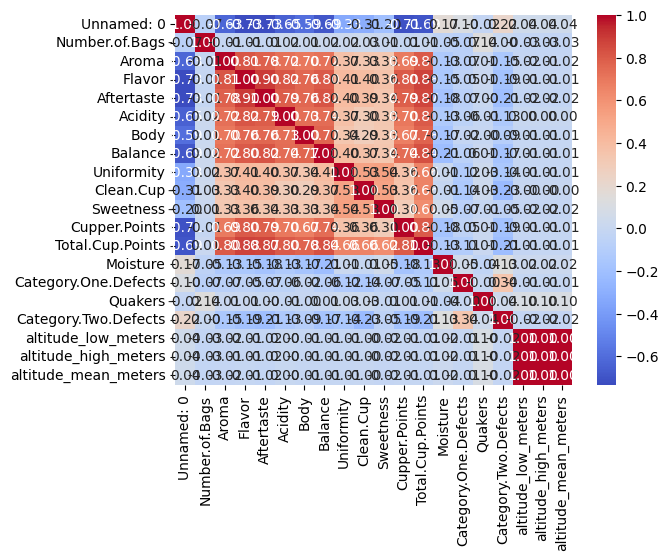

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

## 6. Pairplot of Key Metrics

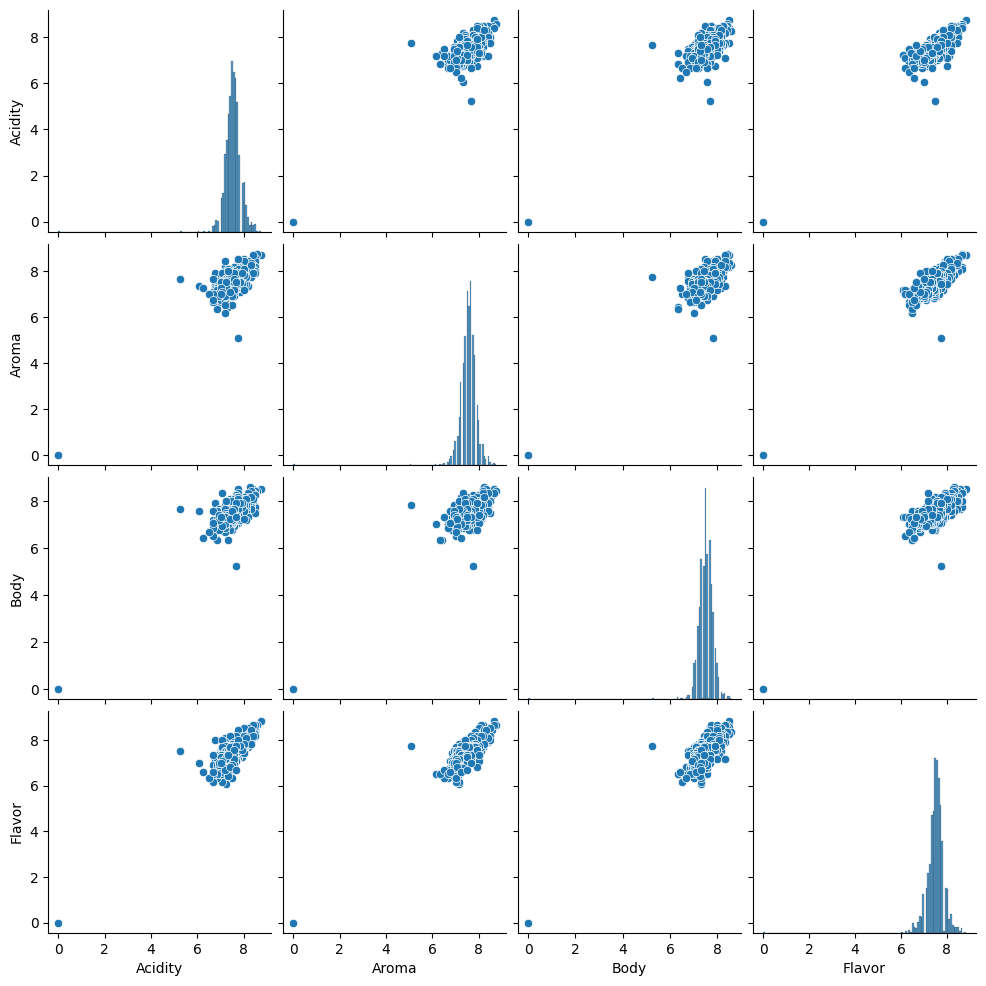

In [8]:
sns.pairplot(df[['Acidity', 'Aroma', 'Body', 'Flavor']])

## 7. Countplot of Variety

<Axes: xlabel='count', ylabel='Variety'>

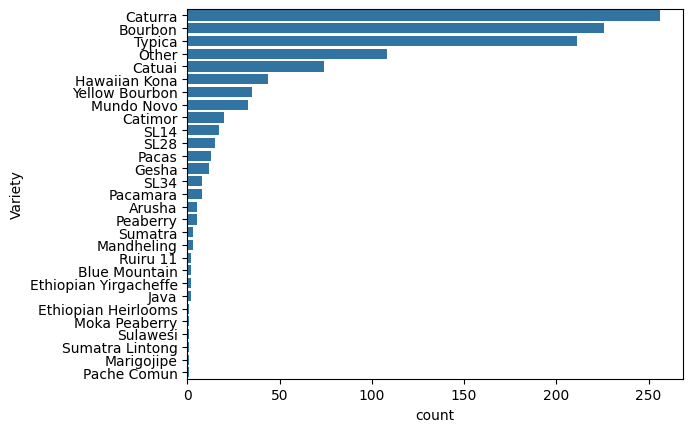

In [9]:
sns.countplot(data=df, y='Variety', order=df['Variety'].value_counts().index)

## 8. Scatterplot of Acidity vs Body

<Axes: xlabel='Acidity', ylabel='Body'>

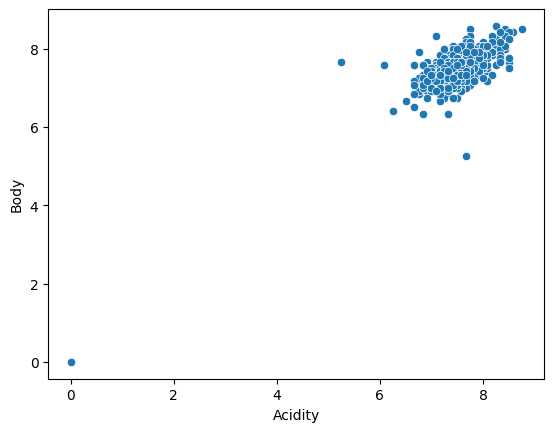

In [10]:
sns.scatterplot(data=df, x='Acidity', y='Body')

## 9. Swarmplot of Aroma by Altitude

/Users/josepferrersanchez/PRO/My-Articles-Friendly-Links/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepferrersanchez/PRO/My-Articles-Friendly-Links/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepferrersanchez/PRO/My-Articles-Friendly-Links/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josepferrersanchez/PRO/My-Articles-Friendly-Links/venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want 

<Axes: xlabel='Aroma', ylabel='Country.of.Origin'>

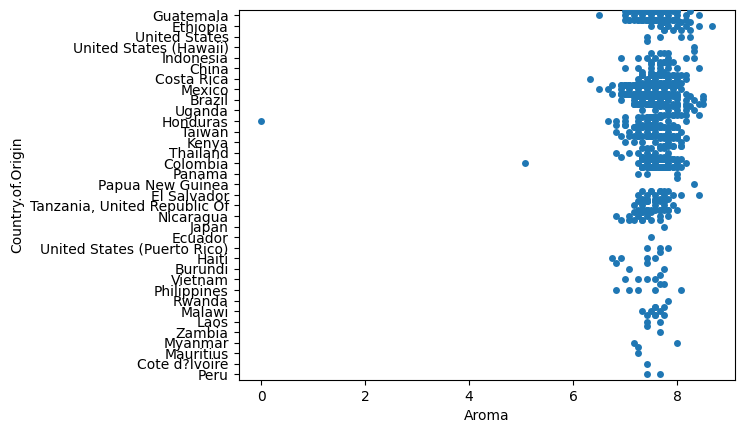

In [11]:
sns.swarmplot(data=df[df['altitude_high_meters'] < 2000], x='Aroma', y='Country.of.Origin')

## 10. Time Series Line Plot (Synthetic Date)


<Axes: xlabel='fake_date'>

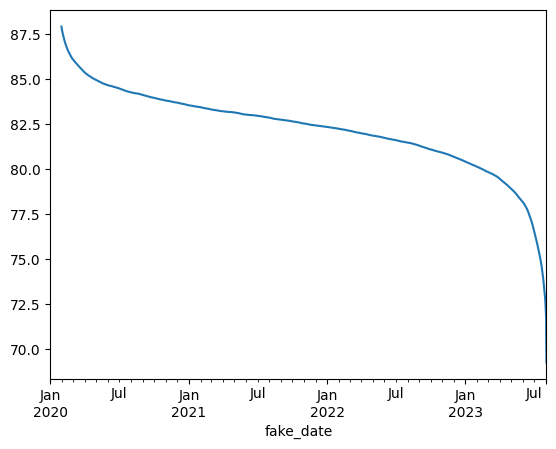

In [12]:
df['fake_date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
df.set_index('fake_date')['Total.Cup.Points'].rolling(30).mean().plot()